In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart_df = pd.read_csv('/content/drive/MyDrive/datasets/Heart_Disease_Prediction.csv')

In [4]:
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [6]:
heart_df.duplicated().sum()

0

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
categorical_list = ["Sex", "Chest pain type","FBS over 120","EKG results","Exercise angina","Slope of ST", "Thallium", "Number of vessels fluro","Heart Disease"]

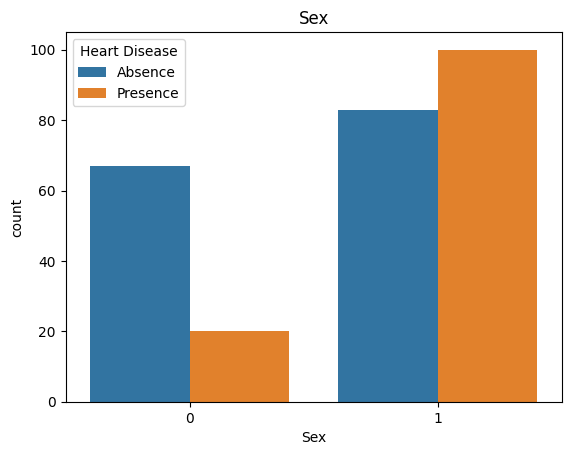

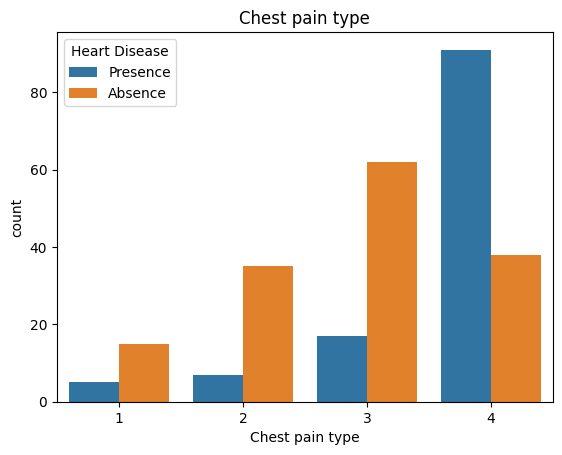

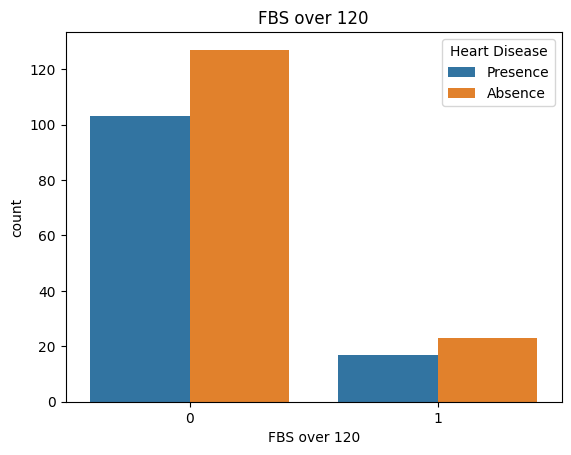

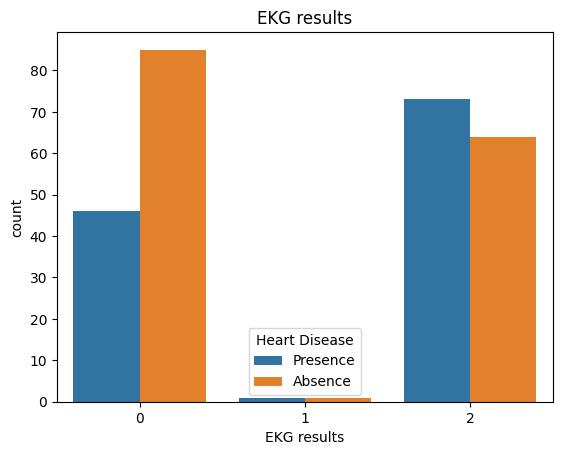

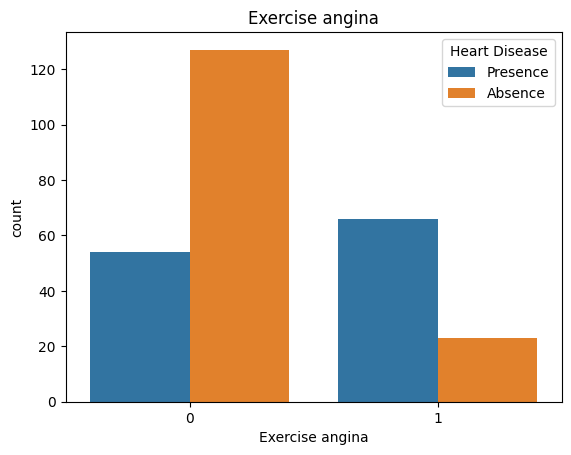

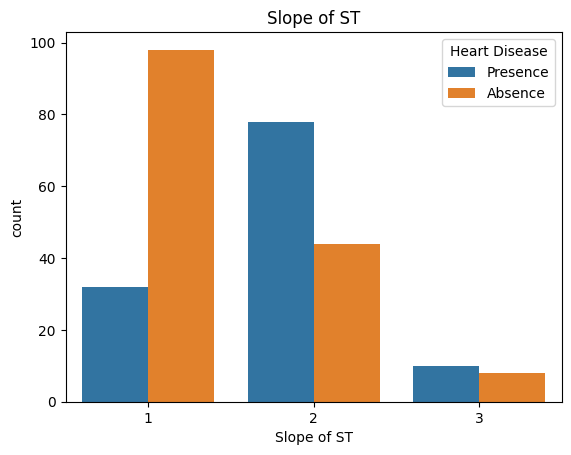

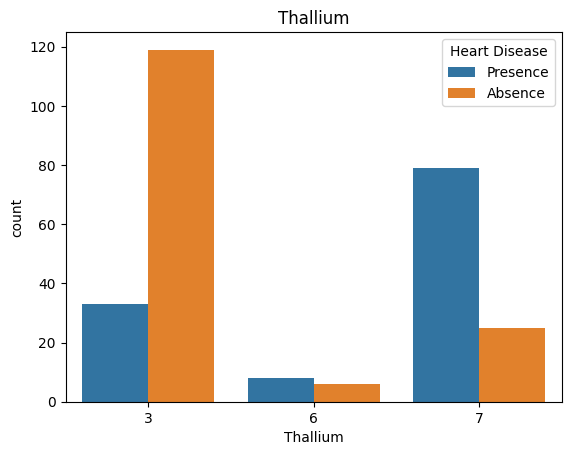

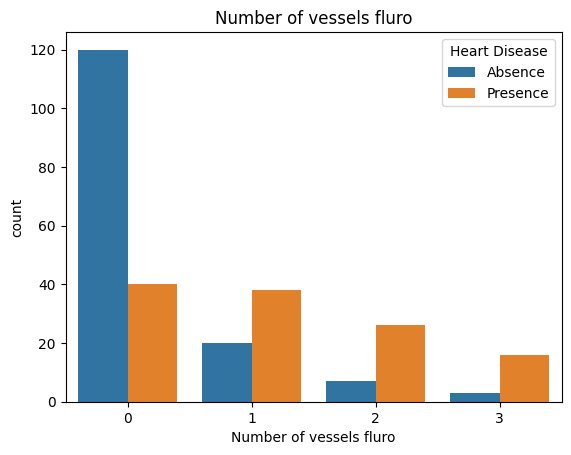

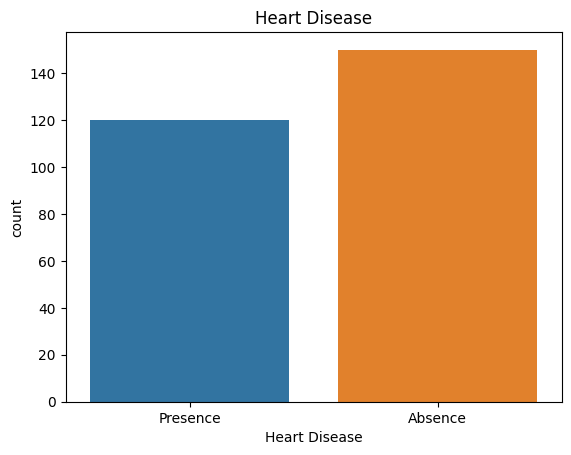

In [9]:
df_categoric = heart_df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "Heart Disease")
    plt.title(i)

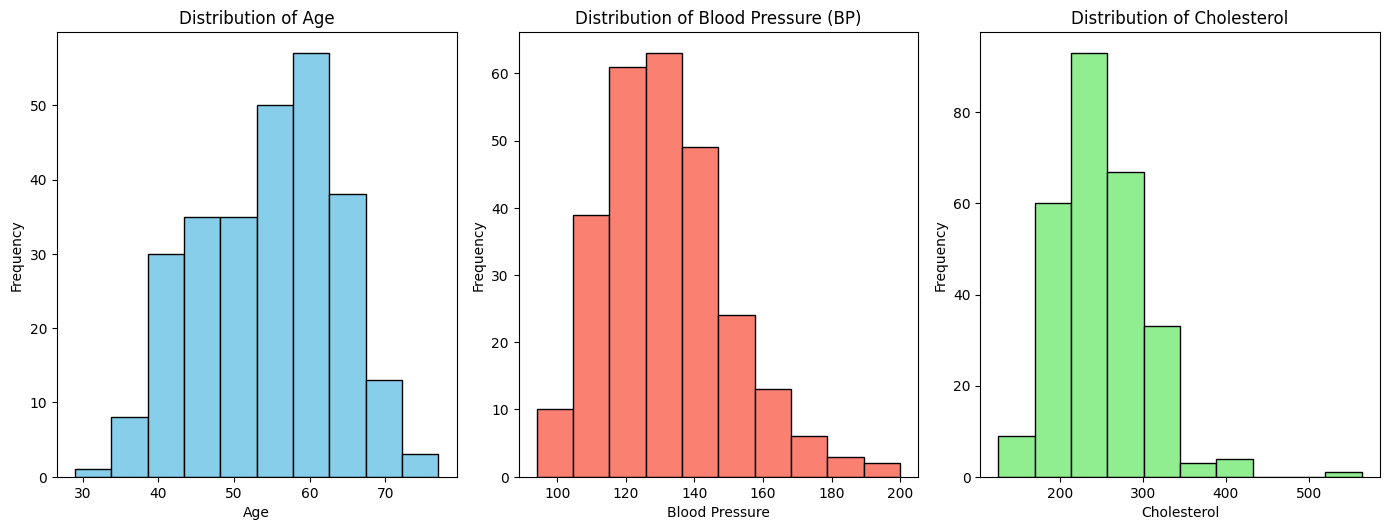

In [10]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.hist(heart_df['Age'], bins=10, edgecolor='k', color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.subplot(2, 3, 2)
plt.hist(heart_df['BP'], bins=10, edgecolor='k', color='salmon')
plt.title("Distribution of Blood Pressure (BP)")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")


plt.subplot(2, 3, 3)
plt.hist(heart_df['Cholesterol'], bins=10, edgecolor='k', color='lightgreen')
plt.title("Distribution of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

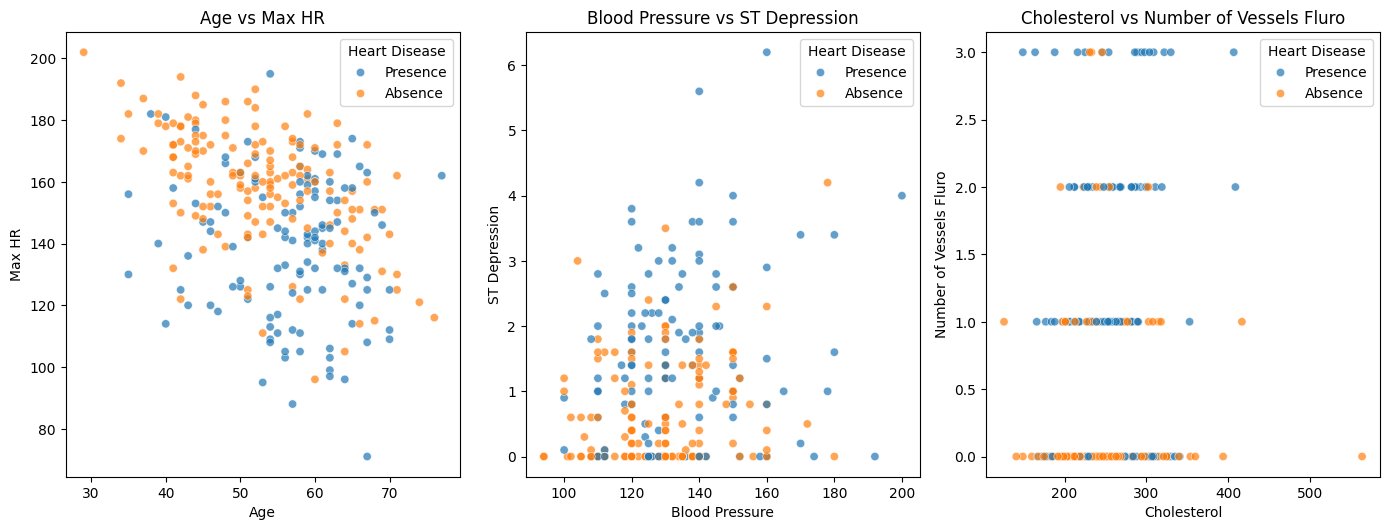

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x = 'Age', y = 'Max HR', hue = "Heart Disease", data = heart_df, alpha=0.7, color='purple')
plt.title("Age vs Max HR")
plt.xlabel("Age")
plt.ylabel("Max HR")


plt.subplot(2, 3, 2)
sns.scatterplot(x = 'BP', y  = 'ST depression', data = heart_df,hue = "Heart Disease", alpha=0.7, color='orange')
plt.title("Blood Pressure vs ST Depression")
plt.xlabel("Blood Pressure")
plt.ylabel("ST Depression")

plt.subplot(2, 3, 3)
sns.scatterplot(x = 'Cholesterol', y = 'Number of vessels fluro', data = heart_df,hue = "Heart Disease", alpha=0.7, color='teal')
plt.title("Cholesterol vs Number of Vessels Fluro")
plt.xlabel("Cholesterol")
plt.ylabel("Number of Vessels Fluro")


plt.tight_layout()
plt.show()

In [12]:
temp = heart_df.drop(columns = categorical_list)

In [13]:
temp.head()

,Age,BP,Cholesterol,Max HR,ST depression
0,70,130,322,109,2.4
1,67,115,564,160,1.6
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2


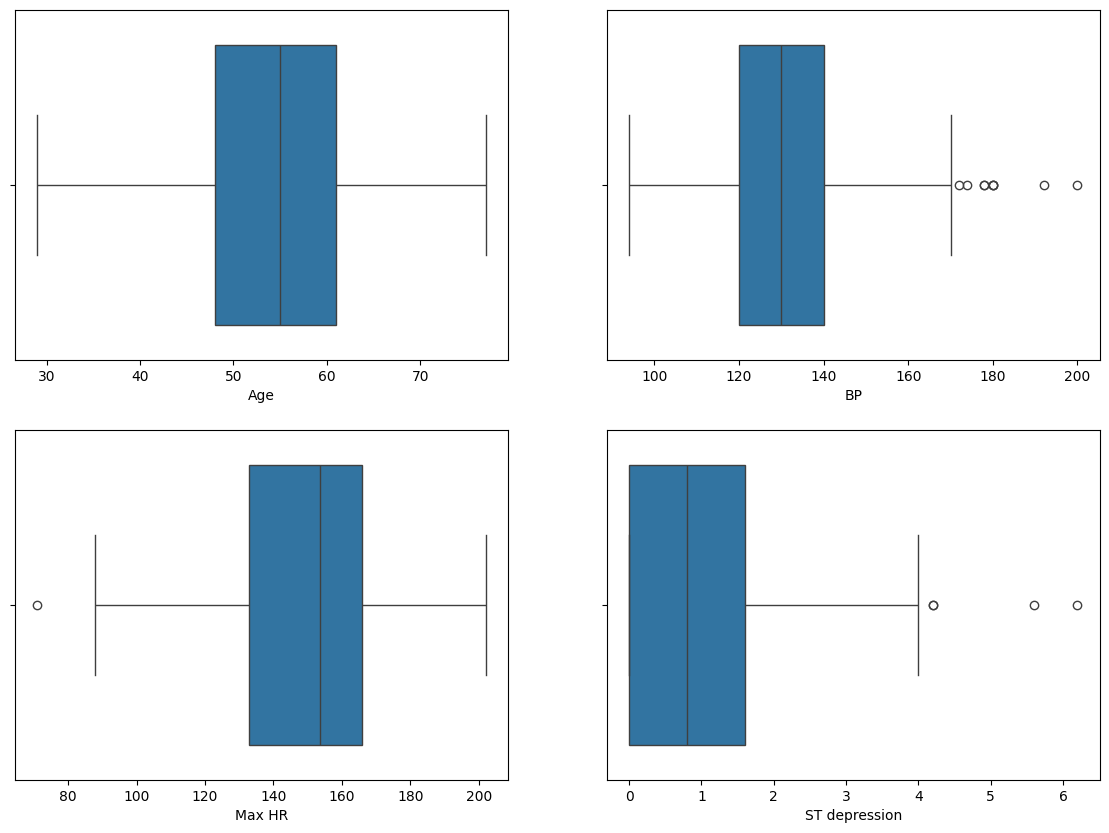

In [14]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data = temp, x='Age')

plt.subplot(2, 2, 2)
sns.boxplot(data = temp, x='BP')

plt.subplot(2, 2, 3)
sns.boxplot(data = temp, x='Max HR')

plt.subplot(2, 2, 4)
sns.boxplot(data = temp, x='ST depression')

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
label_encoder = LabelEncoder()

In [18]:
heart_df['Heart Disease'] = label_encoder.fit_transform(heart_df['Heart Disease'])

In [19]:
num_column = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

In [20]:
standsc = StandardScaler()
heart_df[num_column] = standsc.fit_transform(heart_df[num_column])

In [21]:
x = heart_df.drop(columns=['Heart Disease'],axis = 1)
y = heart_df['Heart Disease']

In [22]:
x.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3


In [23]:
y.head()

,Heart Disease
0,1
1,0
2,1
3,0
4,0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train.shape

(216, 13)

In [26]:
x_test.shape

(54, 13)

# **Random Forest**

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
pred_rf = rf.predict(x_test)

In [38]:
accuracy_score(y_test, pred_rf)

0.8888888888888888

In [39]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



In [40]:
conf = confusion_matrix(y_test, pred_rf)

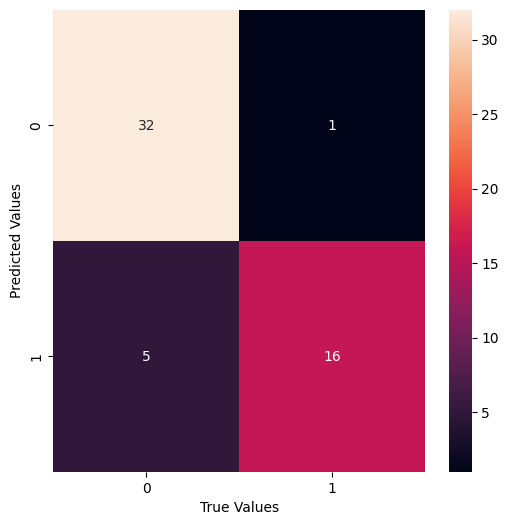

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# **Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg = LogisticRegression(random_state=0)
lg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
pred_lg = lg.predict(x_test)

In [45]:
accuracy_score(y_test, pred_lg)

0.9074074074074074

In [46]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [47]:
conf = confusion_matrix(y_test, pred_lg)

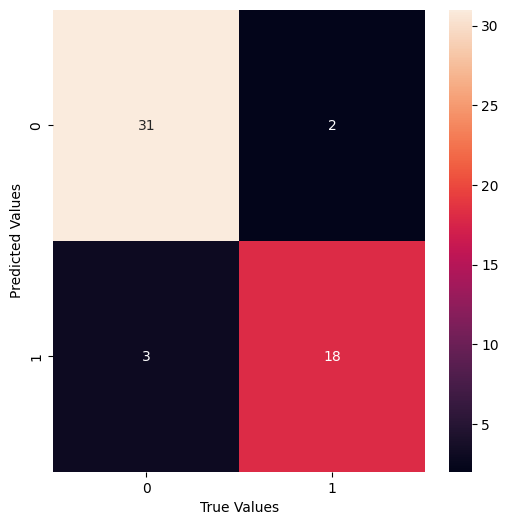

In [48]:
plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# **XGBoost**

In [49]:
from xgboost import XGBClassifier

In [50]:
XGBoost = XGBClassifier()
XGBoost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
pred_XG = XGBoost.predict(x_test)

In [52]:
accuracy_score(y_test, pred_XG)

0.8148148148148148

In [53]:
print(classification_report(y_test, pred_XG))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



In [54]:
conf = confusion_matrix(y_test, pred_XG)

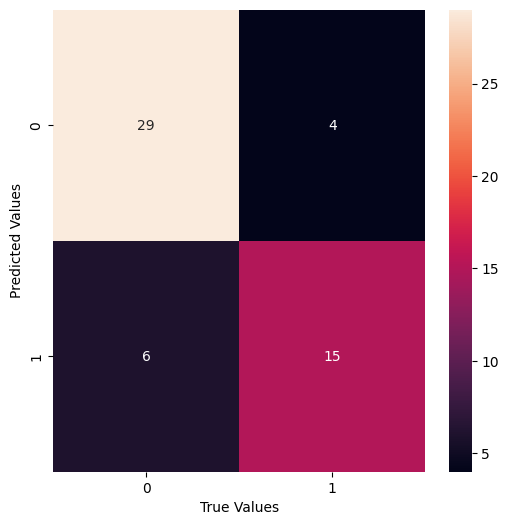

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()